# My first ever matplotlib animation

Head over to this [tweet](https://x.com/pawjast/status/1734245532300628279?s=20) to see the result. 

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
%matplotlib inline

## Data

In [3]:
def parse_data_to_xy(data: list[tuple[float, float]], reverse: bool=False) -> tuple[list[float], list[float]]:
    x_vals = []
    y_vals = []
    for d in data:
        x_vals.append(d[0])
        y_vals.append(d[1])
    
    if reverse:
        x_vals= x_vals[::-1]
        y_vals= y_vals[::-1]

    return x_vals, y_vals


In [4]:
data_tree = [
    (-8, 0),
    (-7, 0),
    (-6, 0),
    (-5, 0),
    (-4, 0),
    (-3, 0),
    (-2, 0),
    (-1, 0),
    (0, 0),
    (1, 0),
    (2, 0),
    (3, 0),
    (4, 0),
    (4, 1),  # 1st level
    (3, 1),
    (2, 1),
    (3, 1.5),
    (4, 2),  # 2nd level
    (3, 2),
    (2, 2),
    (3, 2.5),
    (4, 3),  # 3rd level
    (3, 3),
    (2, 3),
    (2, 3),
    (3, 3.8),
    (4, 4.6),
    (4.5, 5),  # Peak
    (5, 4.6),
    (6, 3.8),
    (7, 3),
    (6, 3),
    (5, 3),
    (6, 2.5),
    (7, 2),
    (6, 2),
    (5, 2),
    (6, 1.5),
    (7, 1),
    (6, 1),
    (5, 1),
    (5, 0),
    (6, 0),
    (7, 0),
    (8, 0),
    (9, 0),
    (10, 0),
    (10, 1),
    (10, 2),
    (10, 3),
    (10, 4),
    (10, 5),
    (10, 6),
    (10, 7),
]

data_cloud = [
    (-9, 8),
    (-8, 7),
    (-7, 7),
    (-6, 8),
    (-5, 7),
    (-4, 7),
    (-3, 8),
    (-2, 7),
    (-1, 7),
    (0, 8),
    (1, 7),
    (2, 7),
    (3, 8),
    (4, 7),
    (5, 7),
    (6, 8),
    (7, 7),
    (8, 7),
    (9, 8),
    (10, 7),
]

# snow flakes 1
xs1, ys1 = np.meshgrid(
    np.arange(-1, 12, 2),
    np.arange(1, 8, 2)
)
xs2, ys2 = np.meshgrid(
    np.arange(0, 13, 2),
    np.arange(0, 7, 2)
)

ys1 = ys1[::-1, :]
ys2 = ys2[::-1, :]

x_tree, y_tree = parse_data_to_xy(data=data_tree)
x_cloud, y_cloud = parse_data_to_xy(data=data_cloud, reverse=True)

x_star, y_star = (4.5, 5)

## Let's try to animate

In [5]:
xmin = x_tree[0]-1
xlim_offset = 11
xmax = xmin + xlim_offset

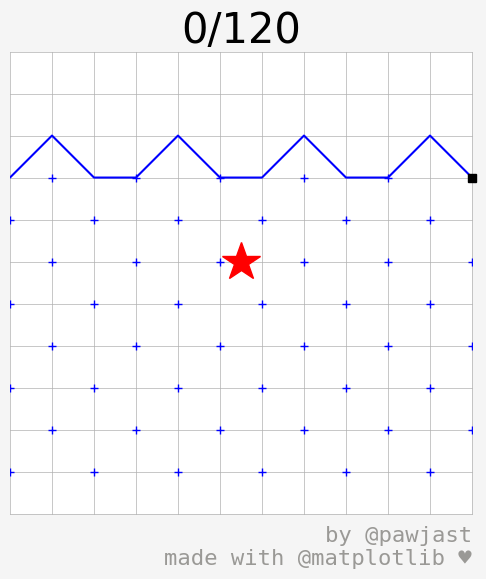

In [6]:
fig, ax = plt.subplots(
    figsize=(6, 6),
    facecolor="whitesmoke"
)

# Axis settings
ax.set_title("")
ax.set_aspect("equal")
ax.set_xticks(ticks=range(xmin, 12))
ax.set_yticks(ticks=range(-1, 11))
ax.set_xlim(xmin, xmax)
ax.set_ylim(-1, 10)
ax.spines[["top", "bottom", "left", "right"]].set_visible(False)
ax.grid(
    lw=0.5,
    clip_on=False
)
ax.tick_params(
    bottom=False,
    labelbottom=False,
    left=False,
    labelleft=False
)
# Footer
ax.text(
    1, -0.12,
    "by @pawjast\nmade with @matplotlib \u2665",
    transform = ax.transAxes,
    horizontalalignment="right",
    verticalalignment="bottom",
    color="#9a9996",
    fontsize=16,
    family="monospace",
    weight="medium"
)

# Initiate plots
tree_plot, = ax.plot([], [], "g-")  # empty tree
cloud_plot, = ax.plot(x_cloud, y_cloud, "b-")  # cloud
snow_plot_1, = ax.plot([], [], "+b")  # snowflakes 1
snow_plot_2, = ax.plot([], [], "+b")  # snowflakes 2
plot_head, = ax.plot([], [], "sk", clip_on=False)  # empty tree head
plot_star, = ax.plot(x_star, y_star, marker="*", color="red", markersize=0)

# Frame count
gap = 66
frame_count = (
    len(data_tree)  # time to draw a tree
    + gap

)


def update(frame):
    # Make the impression of the scene moving by changing the xlim at
    # the beginning of the animation
    if 2 < frame < 11:
        ax.set_xlim(
            x_tree[frame-3],
            x_tree[frame-3]+xlim_offset
        )

    # DRAW HEAD
    # It draws the tree and then goes up to the cloud to 'trigger' the snow fall
    if frame <= len(data_tree):
        plot_head.set_data(
            [x_tree[frame-1]],
            [y_tree[frame-1]]
        )
    else:
        plot_head.set_data([], [])


    # DRAW TREE
    if frame <= len(data_tree)-7:
        # Update the tree plot
        tree_plot.set_data(
            x_tree[:frame],
            y_tree[:frame]
        )
    else:
        tree_plot.set_data(
            x_tree[:-7],
            y_tree[:-7]
        )

    # DRAW SNOW FLAKES FALL
    snow_flake_frame_counter = None
    idx_counter = 0

    if len(data_tree) < frame < len(data_tree) + 9:
        snow_flake_frame_counter = frame - len(data_tree)
        if snow_flake_frame_counter % 2 == 1:
            idx_counter = int((snow_flake_frame_counter + snow_flake_frame_counter % 2) / 2)
            snow_plot_1.set_data(
                xs1[:idx_counter, :],
                ys1[:idx_counter, :],
            )
        else:
            idx_counter = int((snow_flake_frame_counter + snow_flake_frame_counter % 2) / 2)
            snow_plot_2.set_data(
                xs2[:idx_counter, :],
                ys2[:idx_counter, :],
            )
    
    # DRAW SNOW FLAKES FLICKING
    if frame > len(data_tree) + 8:
        if frame % 2 == 1:
            snow_plot_1.set_data(
                xs1-1, ys1,
            )
            snow_plot_2.set_data(
                xs2-1, ys2,
            )
        else:
            snow_plot_1.set_data(
                xs1, ys1,
            )
            snow_plot_2.set_data(
                xs2, ys2,
            )

    if (len(data_tree) + 9) < frame < (len(data_tree) + 39):
        star_size = frame - (len(data_tree) + 9)
        plot_star.set_markersize(star_size)
    else:
        pass

    # Update tile
    ax.set_title(f"{frame}/{frame_count}", fontsize=30)

    return tree_plot, plot_head, snow_plot_1, snow_plot_2, plot_star


# Animate
ani = FuncAnimation(
    fig=fig,
    func=update,
    frames=frame_count,
    interval=175
)

# ani.save("ani.gif")
ani.save("ani.mp4")
